In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv(r'C:\Users\AASHI SINGHAL\Desktop\StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

# K-means Clustering

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
X=df[df.columns[5:8]]
X

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [12]:
sse = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    sse.append(km.inertia_)
sse


[673318.6020000001,
 281951.8965908356,
 177468.18112786938,
 136368.21923926816,
 111310.2084620722,
 97655.79683896402,
 85721.08100208925,
 76508.8336278606,
 68532.87173907302,
 61519.29827348008]

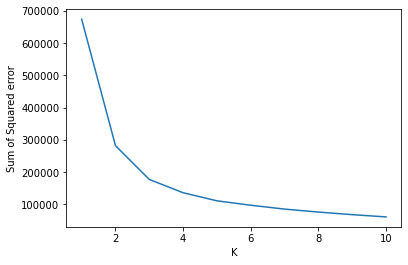

In [13]:
plt.xlabel('K')
plt.ylabel('Sum of Squared error')
plt.plot(range(1,11),sse)

In [14]:
km=KMeans(n_clusters=3)
km.fit(X)
km.labels_

array([0, 1, 1, 2, 1, 1, 1, 2, 0, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 2, 0, 2, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 1, 1, 0,
       0, 1, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0,
       1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 2,
       1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 0, 2,
       0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 2, 1,
       2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2,
       2, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 2, 0, 2,
       0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1,
       2, 2, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 2, 1,
       0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 1, 1,

Text(0.5, 1.0, 'Math score vs Writing score')

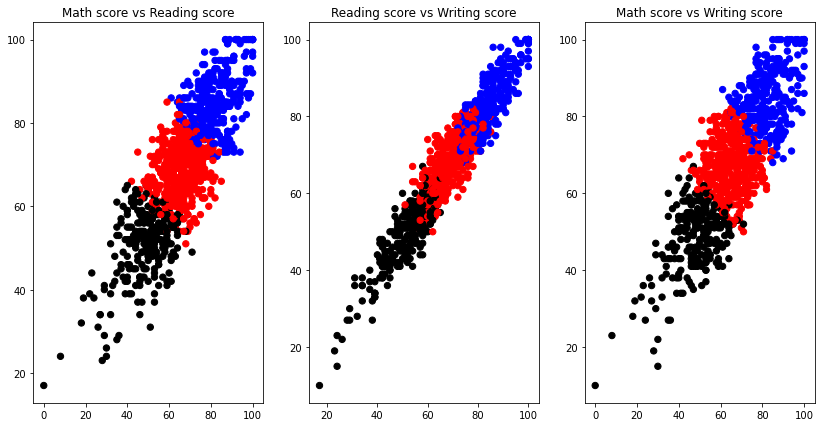

In [17]:
colormap=np.array(['red','blue','black'])
plt.figure(figsize=(14,7))
plt.subplot(1,3,1)
plt.scatter(X["math score"],X["reading score"],c=colormap[km.labels_],s=40)
plt.title("Math score vs Reading score")
plt.subplot(1,3,2)
plt.scatter(X["reading score"],X["writing score"],c=colormap[km.labels_],s=40)
plt.title("Reading score vs Writing score")
plt.subplot(1,3,3)
plt.scatter(X["math score"],X["writing score"],c=colormap[km.labels_],s=40)
plt.title("Math score vs Writing score")

# Hierarchical Clustering

In [18]:
import scipy.cluster.hierarchy as sch

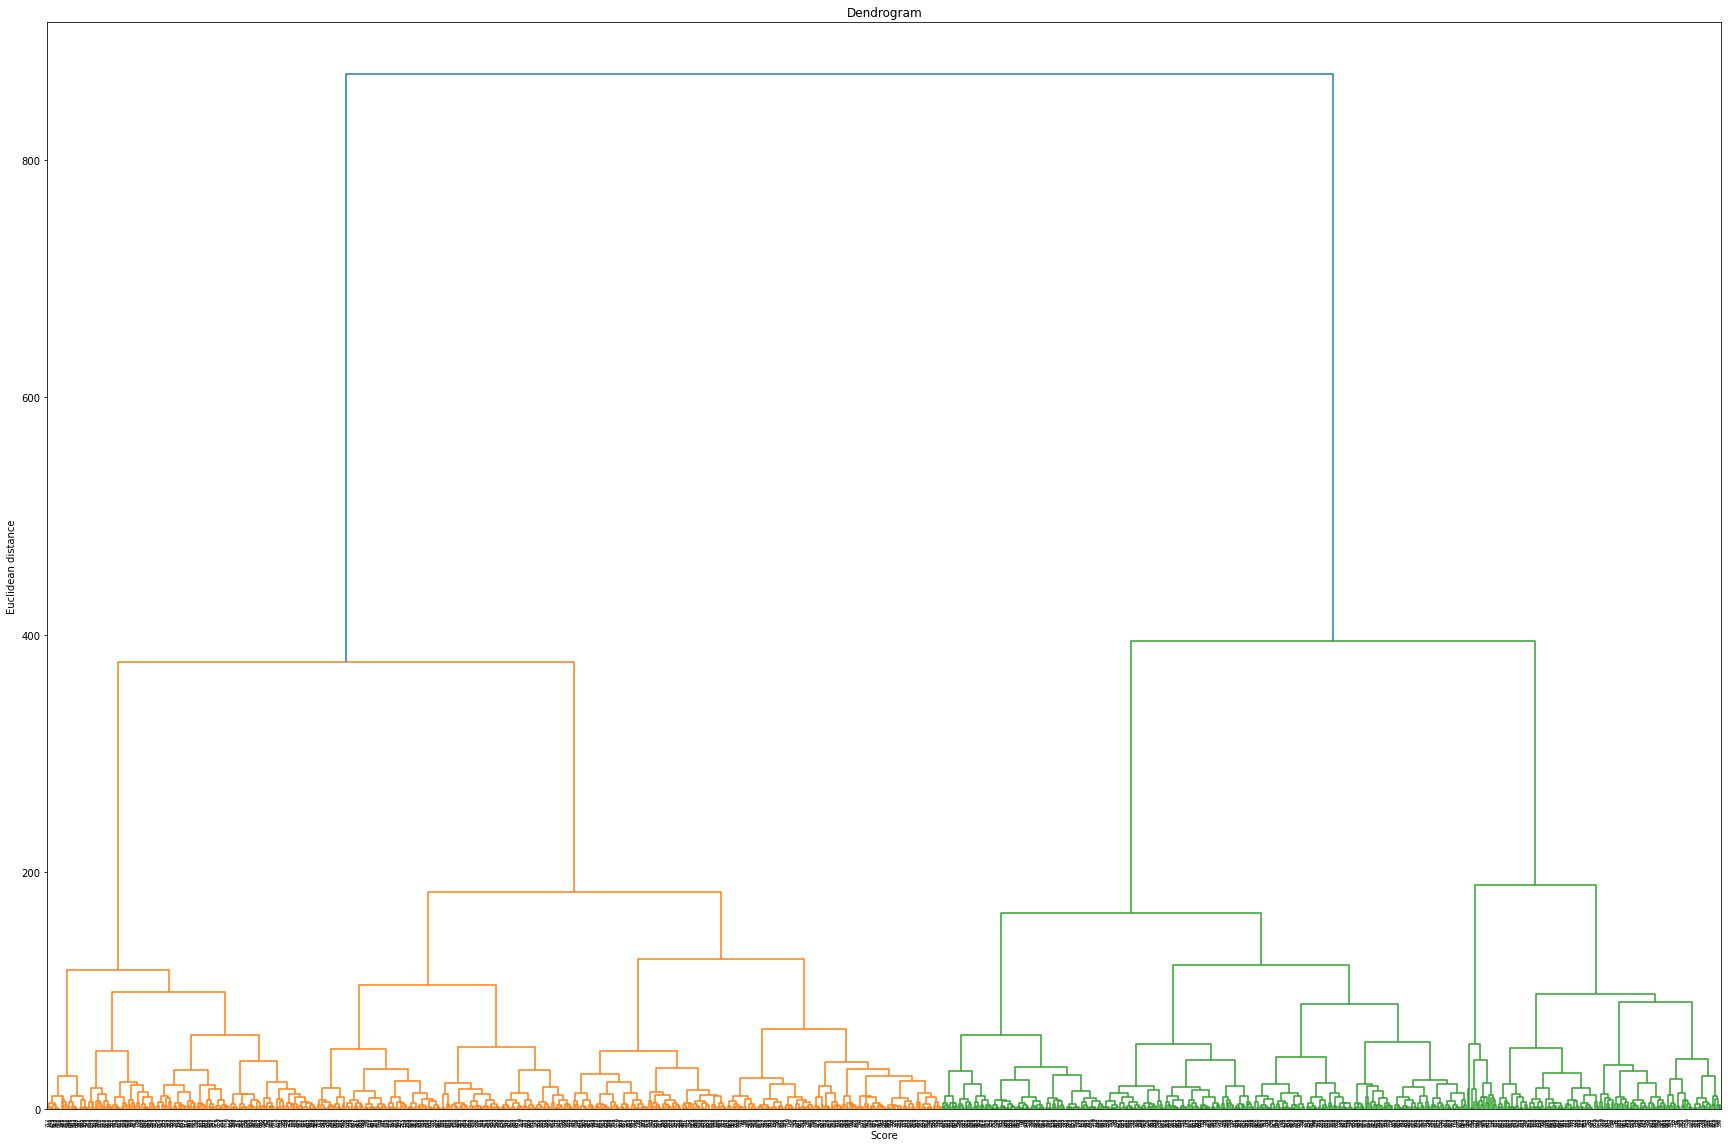

In [24]:
plt.figure(figsize=(30,20))
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Score")
plt.ylabel("Euclidean distance")
plt.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')

In [26]:
y_hc = hc.fit_predict(X)

In [27]:
len(X)

1000

In [28]:
y_hc

array([0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0,

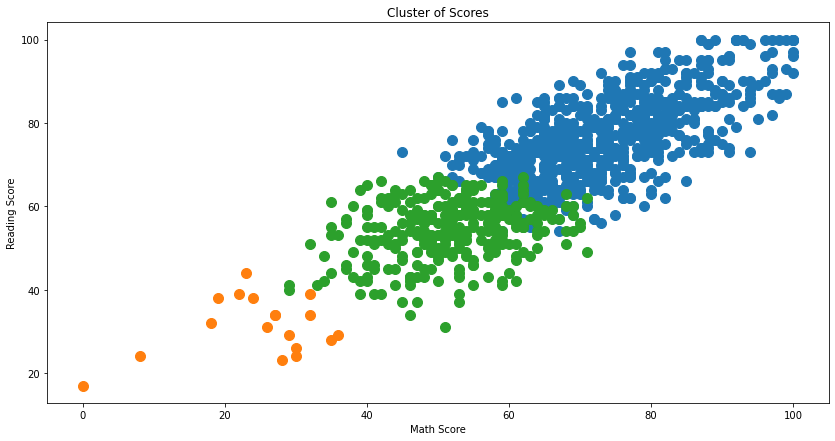

In [39]:
plt.figure(figsize=(14,7))
plt.scatter(X[y_hc==0]['math score'], X[y_hc==0]['reading score'], s=100, label='Cluster 1')
plt.scatter(X[y_hc==1]['math score'], X[y_hc==1]['reading score'], s=100, label='Cluster 2')
plt.scatter(X[y_hc==2]['math score'], X[y_hc==2]['reading score'], s=100, label='Cluster 3')
plt.title('Cluster of Scores')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.show()


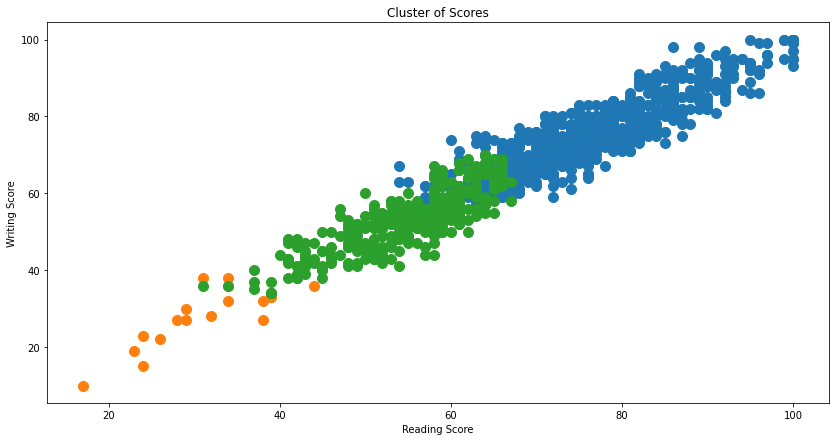

In [40]:
plt.figure(figsize=(14,7))
plt.scatter(X[y_hc==0]['reading score'], X[y_hc==0]['writing score'], s=100, label='Cluster 1')
plt.scatter(X[y_hc==1]['reading score'], X[y_hc==1]['writing score'], s=100, label='Cluster 2')
plt.scatter(X[y_hc==2]['reading score'], X[y_hc==2]['writing score'], s=100, label='Cluster 3')
plt.title('Cluster of Scores')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.show()


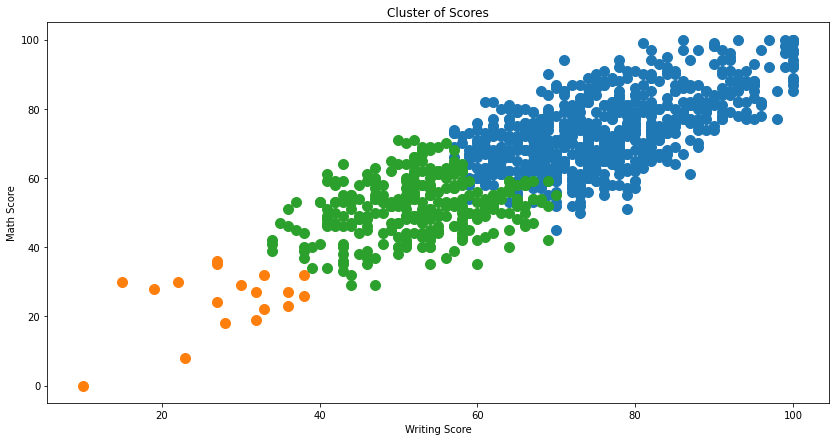

In [41]:
plt.figure(figsize=(14,7))
plt.scatter(X[y_hc==0]['writing score'], X[y_hc==0]['math score'], s=100, label='Cluster 1')
plt.scatter(X[y_hc==1]['writing score'], X[y_hc==1]['math score'], s=100, label='Cluster 2')
plt.scatter(X[y_hc==2]['writing score'], X[y_hc==2]['math score'], s=100, label='Cluster 3')
plt.title('Cluster of Scores')
plt.xlabel('Writing Score')
plt.ylabel('Math Score')
plt.show()
